In [1]:
!pip install bs4

  Created wheel for bs4: filename=bs4-0.0.1-cp36-none-any.whl size=2248 sha256=ca80ece87727f9fd2a2b25fd275bea995a52983fef1f0e5095d5ff3149150acf
  Stored in directory: /home/nbuser/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [5]:
import os 
import time
import requests
import sys

def retrieve_html():
    for year in range(2013,2019):
        for month in range(1,13):
            if(month < 10):
                url = 'https://en.tutiempo.net/climate/0{}-{}/ws-421820.html'.format(month, year)
            else:
                url = 'https://en.tutiempo.net/climate/{}-{}/ws-421820.html'.format(month, year)
                
            texts = requests.get(url)
            text_utf = texts.text.encode('utf=8')
            if not os.path.exists('Data/Html_Data/{}'.format(year)):
                os.makedirs('Data/Html_Data/{}'.format(year))
            with open('Data/Html_Data/{}/{}.html'.format(year,month),"wb") as output:
                output.write(text_utf)
        
        sys.stdout.flush()
        
if __name__ == "__main__":
    start_time = time.time()
    retrieve_html()
    stop_time = time.time()
    print('Time taken {}'.format(stop_time-start_time))
    
            

Time taken 67.17341017723083


In [6]:
from bs4 import BeautifulSoup

with open('Data/Html_Data/2013/1.html',"rb") as output:
            html_doc = output.read()
        
soup = BeautifulSoup(html_doc,'html.parser')
#print(soup)
strhtm = soup.prettify()
print(strhtm)

<!DOCTYPE html>
<html class="pretty-scrollbar" lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <meta content="Tutiempo Network, S.L." name="author"/>
  <meta content="global" name="distribution"/>
  <meta content="app-id=526005265" name="apple-itunes-app"/>
  <meta content="yes" name="mobile-web-app-capable"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="black" name="apple-mobile-web-app-status-bar-style"/>
  <link href="/favicon.ico" rel="shortcut icon" type="image/ico"/>
  <link href="/Browser/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/Browser/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/Browser/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/Browser/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>

In [7]:
summary = soup.find('div',{'class':'mt5 minoverflow tablancpy'})
print(summary.prettify())

<div class="mt5 minoverflow tablancpy">
 <table cellpadding="0" cellspacing="0" class="medias mensuales numspan" style="width:100%;">
  <tr>
   <th>
    Day
   </th>
   <th>
    <abbr class="tooltip" title="Average Temperature">
     T
    </abbr>
   </th>
   <th>
    <abbr class="tooltip" title="Maximum temperature">
     TM
    </abbr>
   </th>
   <th>
    <abbr class="tooltip" title="Minimum temperature">
     Tm
    </abbr>
   </th>
   <th>
    <abbr class="tooltip" title="Atmospheric pressure at sea level">
     SLP
    </abbr>
   </th>
   <th>
    <abbr class="tooltip" title="Average relative humidity">
     H
    </abbr>
   </th>
   <th>
    <abbr class="tooltip" title="Total rainfall and / or snowmelt">
     PP
    </abbr>
   </th>
   <th>
    <abbr class="tooltip" title="Average visibility">
     VV
    </abbr>
   </th>
   <th>
    <abbr class="tooltip" title="Average wind speed">
     V
    </abbr>
   </th>
   <th>
    <abbr class="tooltip" title="Maximum sustained wind speed

In [8]:
import numpy as np

features = []

for row,i in zip(summary.find('table').findAll('tr'),range(len(summary.find('table').findAll('tr')))):
    for col,j in zip(row.findAll('td'),range(len(row.findAll('td')))):
        features.append(col.find(text=True))
  

features = np.array(features).reshape(-1,15)
print(features)
#np.reshape(features, (-1,15))

features = np.delete(features, np.s_[0,6,10,11,12,13,14], axis=1)
length = len(features)
print(length)
features = features[:(length-1),:]
print(features)

[['1' '9.1' '15.3' '4' '1015.6' '90' '0' '0.5' '0' '-' '-' '\xa0' '\xa0'
  '\xa0' 'o']
 ['2' '7.4' '9.8' '4.8' '1017.6' '93' '0' '0.5' '4.3' '9.4' '-' '\xa0'
  '\xa0' '\xa0' 'o']
 ['3' '7.8' '12.7' '4.4' '1018.5' '87' '0' '0.6' '4.4' '11.1' '-' '\xa0'
  '\xa0' '\xa0' 'o']
 ['4' None None None None None None None None None None '\xa0' '\xa0'
  '\xa0' 'o']
 ['5' None None None None None None None None None None '\xa0' '\xa0'
  '\xa0' 'o']
 ['6' None None None None None None None None None None '\xa0' '\xa0'
  '\xa0' 'o']
 ['7' '6.7' '13.4' '2.4' '1019.4' '82' '0' '0.6' '4.8' '11.1' '-' '\xa0'
  '\xa0' '\xa0' 'o']
 ['8' '8.6' '15.5' '3.3' '1018.7' '72' '0' '0.8' '8.1' '20.6' '-' '\xa0'
  '\xa0' '\xa0' 'o']
 ['9' '12.4' '20.9' '4.4' '1017.3' '61' '0' '1.3' '8.7' '22.2' '-' '\xa0'
  '\xa0' '\xa0' '\xa0']
 ['10' None None None None None None None None None None '\xa0' '\xa0'
  '\xa0' '\xa0']
 ['11' None None None None None None None None None None '\xa0' '\xa0'
  '\xa0' '\xa0']
 ['12' None N

In [9]:
import pandas as pd

aqi_data = pd.DataFrame(features)
aqi_data.columns = ['T','TM','Tm','SLP','H','VV','V','VM']

aqi_data.isna().sum() # printing the number of null values in each column

T      15
TM     15
Tm     15
SLP    15
H      15
VV     15
V      15
VM     15
dtype: int64

In [10]:
aqi_data.fillna(value = pd.np.nan, inplace=True)
aqi_data = aqi_data.apply(pd.to_numeric, errors='coerce')

In [11]:
print(aqi_data.dtypes)
aqi_data

T      float64
TM     float64
Tm     float64
SLP    float64
H      float64
VV     float64
V      float64
VM     float64
dtype: object


,T,TM,Tm,SLP,H,VV,V,VM
0,9.1,15.3,4.0,1015.6,90.0,0.5,0.0,NaN
1,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
2,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
7,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
8,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
k = aqi_data[:31][:].describe()
k

,T,TM,Tm,SLP,H,VV,V,VM
count,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000
mean,11.675000,18.78125,5.937500,1018.131250,75.875000,1.087500,4.981250,14.326667
std,2.857388,4.22914,2.028094,2.213811,10.105279,0.608687,2.838126,5.990643
min,6.700000,9.80000,2.400000,1013.200000,60.000000,0.500000,0.000000,3.500000
25%,8.975000,15.45000,4.400000,1017.050000,69.750000,0.600000,3.725000,10.250000
50%,12.350000,20.40000,6.250000,1018.400000,76.000000,0.800000,4.800000,14.800000
75%,13.475000,21.52500,7.025000,1019.700000,83.250000,1.800000,7.400000,19.450000
max,16.000000,25.20000,10.000000,1021.200000,93.000000,2.100000,8.700000,22.200000


In [13]:
aqi_data = aqi_data.fillna(0)
aqi_data

,T,TM,Tm,SLP,H,VV,V,VM
0,9.1,15.3,4.0,1015.6,90.0,0.5,0.0,0.0
1,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
2,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
7,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
8,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
def met_data(month, year):
    
    file_html = open('Data/Html_Data/{}/{}.html'.format(year,month), 'rb')
    plain_text = file_html.read()

    tempD = []
    finalD = []

    soup = BeautifulSoup(plain_text, "lxml")
    for table in soup.findAll('table', {'class': 'medias mensuales numspan'}):
        for tbody in table:
            for tr in tbody:
                a = tr.get_text()
                tempD.append(a)

    rows = len(tempD) / 15

    for times in range(round(rows)):
        newtempD = []
        for i in range(15):
            newtempD.append(tempD[0])
            tempD.pop(0)
        finalD.append(newtempD)

    length = len(finalD)

    finalD.pop(length - 1)
    finalD.pop(0)

    for a in range(len(finalD)):
        finalD[a].pop(6)
        finalD[a].pop(13)
        finalD[a].pop(12)
        finalD[a].pop(11)
        finalD[a].pop(10)
        finalD[a].pop(9)
        finalD[a].pop(0)

    return finalD

met_data(1, 2013)

[['9.1', '15.3', '4', '1015.6', '90', '0.5', '0', '-'],
 ['7.4', '9.8', '4.8', '1017.6', '93', '0.5', '4.3', '9.4'],
 ['7.8', '12.7', '4.4', '1018.5', '87', '0.6', '4.4', '11.1'],
 ['', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', ''],
 ['6.7', '13.4', '2.4', '1019.4', '82', '0.6', '4.8', '11.1'],
 ['8.6', '15.5', '3.3', '1018.7', '72', '0.8', '8.1', '20.6'],
 ['12.4', '20.9', '4.4', '1017.3', '61', '1.3', '8.7', '22.2'],
 ['', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', ''],
 ['16', '25.2', '10', '1013.2', '79', '0.6', '4.8', '11.1'],
 ['13.4', '21', '9.2', '1015.1', '87', '0.5', '1.5', '7.6'],
 ['14.3', '22.6', '6.6', '1016.3', '76', '0.8', '0.4', '3.5'],
 ['', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', ''],
 ['12.7', '18.9', '7.3', '1021.2', '76', '1.8', '6.1', '16.5'],
 ['11.9', '18.9', '6.3', '1020.1', '76', '1.1', '8.3', '20.6'],
 [

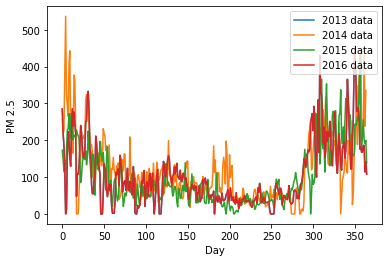

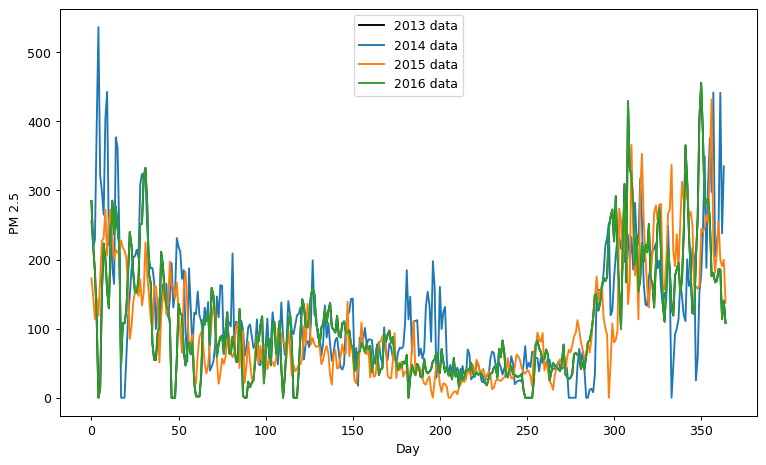

In [19]:
%run Plot_AQI.ipynb

In [20]:
def data_combine(year, cs):
    for a in pd.read_csv('Data/Real-Data/real_' + str(year) + '.csv', chunksize=cs):
        df = pd.DataFrame(data=a)
        mylist = df.values.tolist()
    return mylist

In [29]:
import csv

if __name__ == "__main__":
    if not os.path.exists("Data/Real-Data"):
        os.makedirs("Data/Real-Data")
    
    for year in range(2013, 2019):
        final_data = []
        with open('Data/Real-Data/real_' + str(year) + '.csv', 'w') as csvfile:
            wr = csv.writer(csvfile, dialect='excel')
            wr.writerow(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'])   # adding heading row to the perticular year.csv file
        for month in range(1, 13):
            temp = met_data(month, year)
            final_data = final_data + temp      # appending all the month data to final_data, so now it contains 365|366 rows and 8 column
        
        #print(final_data)
    
        pm = getattr(sys.modules[__name__], 'avg_data_{}'.format(year))()
        #print(pm)
        if len(pm) == 364:
            pm.insert(364, '-')      # make sure length is 365
        
        #print(len(pm))
        #print(len(final_data))
        for i in range(len(final_data)-1):
            # final[i].insert(0, i + 1)
            final_data[i].insert(8, pm[i])    # inserting PM2.5 values in each row on 8th column.
         
        # This below code opens real_{year}.csv  find and writing all the rows of final_data on to this file
        with open('Data/Real-Data/real_' + str(year) + '.csv', 'a') as csvfile:
            wr = csv.writer(csvfile, dialect='excel')
            for row in final_data:
                flag = 0
                for elem in row:
                    if elem == "" or elem == "-":
                        flag = 1
                if flag != 1:
                    wr.writerow(row)
                    
    data_2013 = data_combine(2013, 600)
    data_2014 = data_combine(2014, 600)
    data_2015 = data_combine(2015, 600)
    data_2016 = data_combine(2016, 600)
    #data_2017 = data_combine(2017, 600)
    data_2018 = data_combine(2018, 600)

    total=data_2013+data_2014+data_2015+data_2016+data_2018

    with open('Data/Real-Data/Real_Combine.csv', 'w') as csvfile:
        wr = csv.writer(csvfile, dialect='excel')
        wr.writerow(
            ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'])
        wr.writerows(total)

df=pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.shape                    
    

(909, 9)

In [25]:
df = pd.read_csv('Data/Real-Data/real_2013.csv')
df.shape

(185, 9)

In [26]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [27]:
import numpy as np
z = np.arange(50)
z = z[::-1]
z

array([49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33,
       32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
       15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])